<a href="https://colab.research.google.com/github/srinijadharani/Python-for-ML-and-DS/blob/master/04_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SEABORN**<br>
It is a statistical plotting library based on Matplotlib. It is designed to work efficiently with Pandas DataFrame objects.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **DISTRIBUTION PLOTS**

In [105]:
 tips=sns.load_dataset("tips") 
#tips is a built-in dataset in seaborn that allows you to access through its data. 

In [106]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


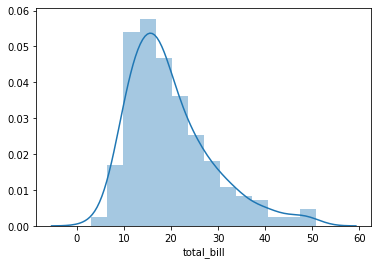

In [107]:
sns.distplot(tips["total_bill"])
#this will return a kde (kernel density estimation (the curve)) and a histogram.

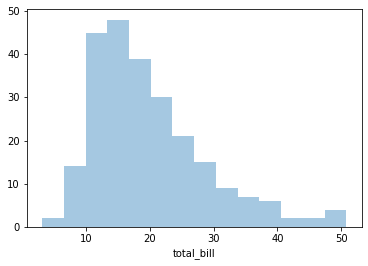

In [108]:
sns.distplot(tips["total_bill"],kde=False)

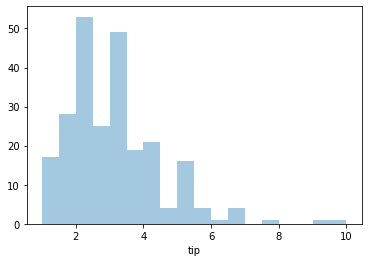

In [109]:
sns.distplot(tips["tip"], kde=False)

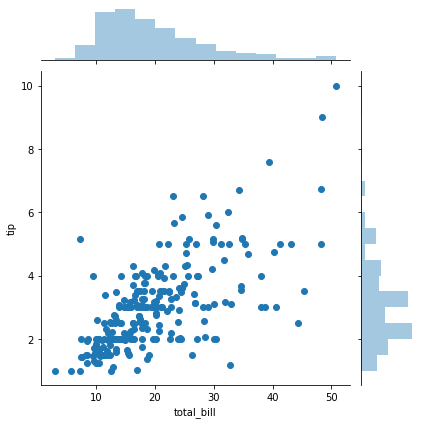

In [110]:
sns.jointplot(x="total_bill",y="tip",data=tips)
#this allows us to join two variant columns
#the scattered plot that is displayed as output indicates that as the total_bill increases, the tip also increases
#the default scattered plot is usually used the most

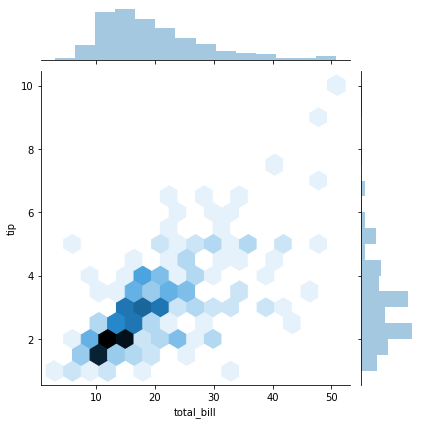

In [111]:
sns.jointplot(x="total_bill",y="tip",data=tips,kind="hex")
#the kind parameter is used to make changes in the way the scattered plot is displayed. 

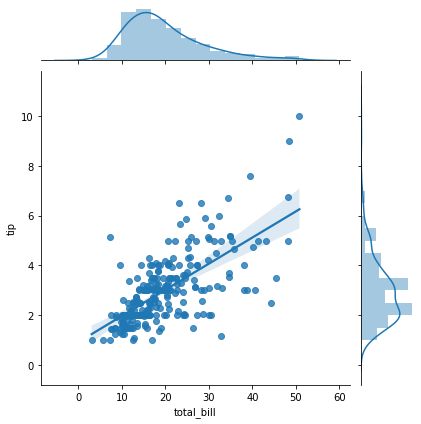

In [112]:
sns.jointplot(x="total_bill",y="tip",data=tips,kind="reg")

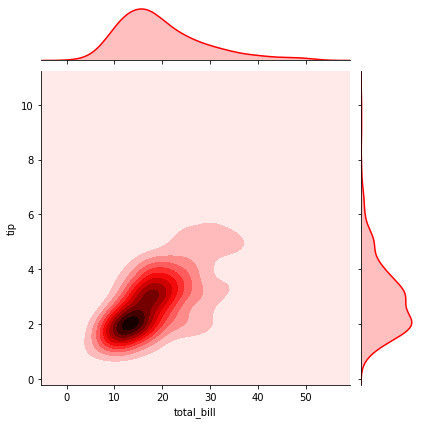

In [113]:
sns.jointplot(x="total_bill",y="tip",data=tips,kind="kde",color="red")
#kde shows where the points match up the most

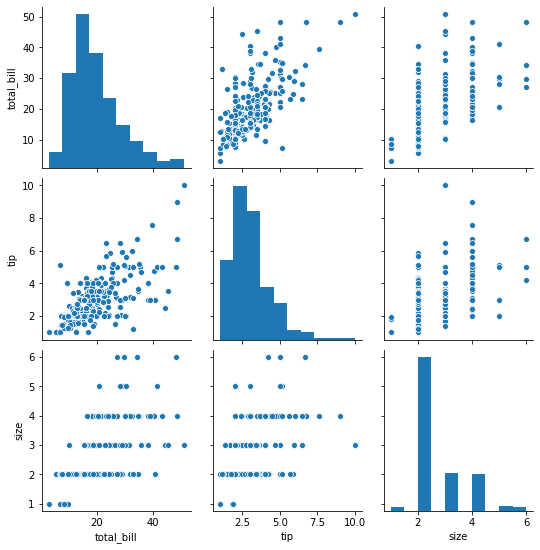

In [114]:
sns.pairplot(tips)
#plots all the graphs using the dataset for all the numerical values (plottable)
#way of quickly visualizing your data

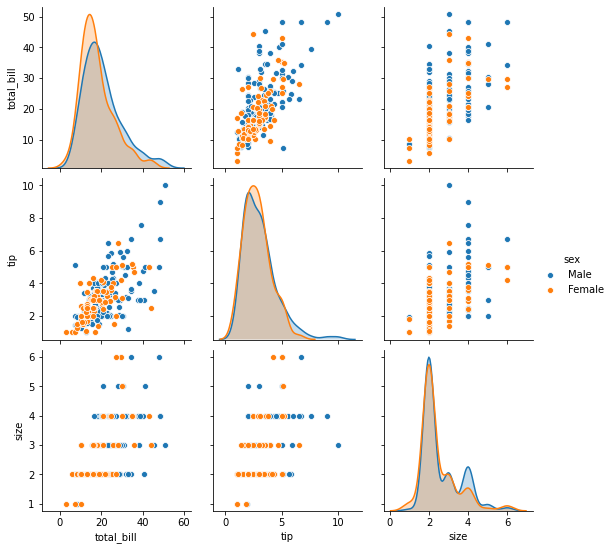

In [115]:
sns.pairplot(tips, hue="sex")
#hue takes in a categorical column in the dataset. 
#it plots the points the column that you have passed as the argument in the pre-existingplots.

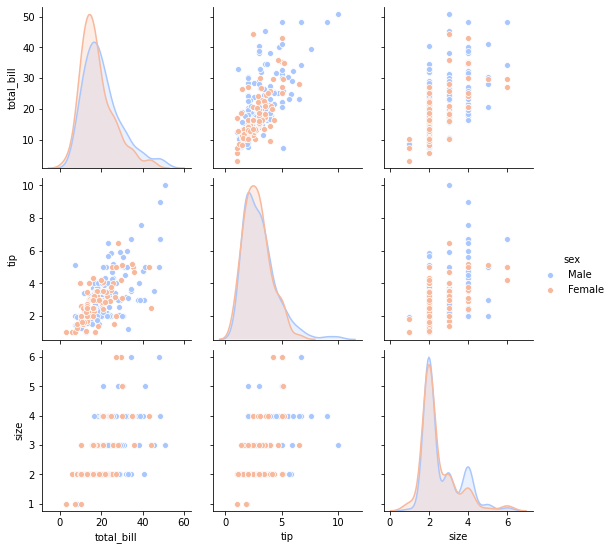

In [116]:
sns.pairplot(tips, hue="sex", palette="coolwarm")

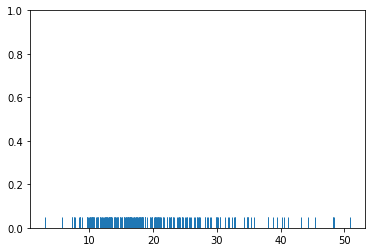

In [117]:
sns.rugplot(tips["total_bill"])

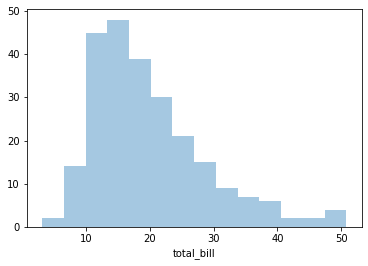

In [118]:
sns.distplot(tips["total_bill"],kde=None)

(0.0, 1.0)

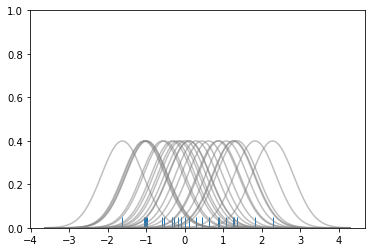

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

#this plots the normal distribution curves along the rugplot for a random distribution
#to convert this whole plot into a kde plot, follow the next cell

KDE (Kernal Density Estimation) is the sum of all the normal distribution curves along the rug plot.

Text(0.5, 0.98, 'Sum of the Basis Functions')

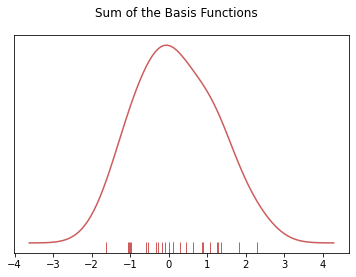

In [120]:
# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

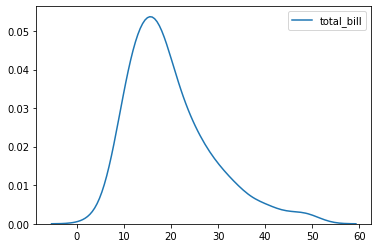

In [121]:
sns.kdeplot(tips["total_bill"])

### **CATEGORICAL PLOTS**<br>
These are the plots that use categorical information (not numeric) for data visualisation. The most basic categorical plot is the bar plot.

In [122]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tips=sns.load_dataset('tips')

In [123]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


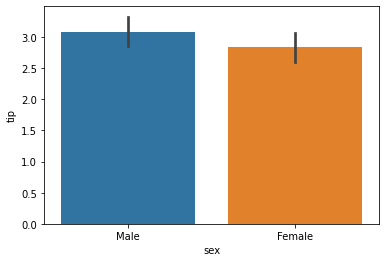

In [124]:
sns.barplot(x=tips["sex"], y=tips["tip"])

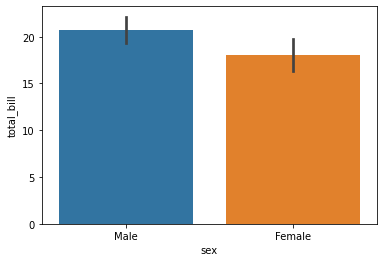

In [125]:
sns.barplot(x=tips["sex"],y=tips["total_bill"])

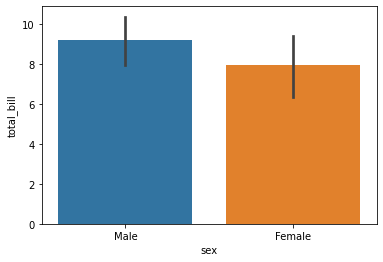

In [126]:
sns.barplot(x=tips['sex'], y=tips["total_bill"], estimator=np.std)
#default of estimator is mean (average)

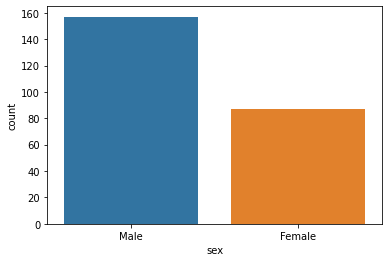

In [127]:
sns.countplot(x=tips["sex"])
#this plot allows the estimator to count the number of occurences of the given data
#the y axis will already be chosen for you. it is the count.

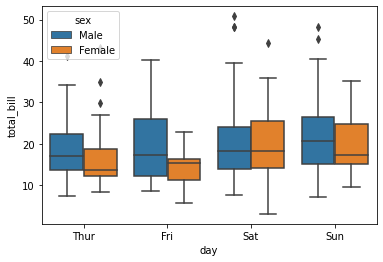

In [128]:
sns.boxplot(x=tips["day"], y=tips["total_bill"], hue=tips["sex"])

In [129]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


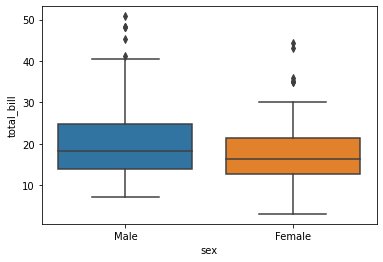

In [130]:
sns.boxplot(x=tips["sex"], y=tips["total_bill"])

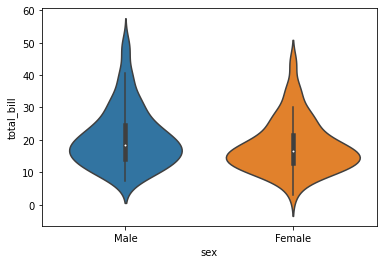

In [131]:
sns.violinplot(x=tips["sex"], y=tips["total_bill"])

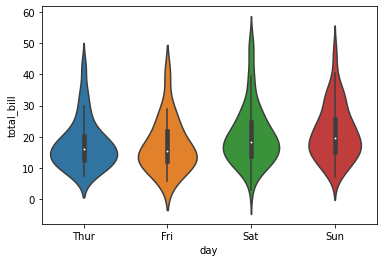

In [132]:
sns.violinplot(x=tips["day"], y=tips["total_bill"])
#violinplot is basically a kde curve when cut along the vertical line. 
#violinplots are easier to read and the points are marked according to the actual values present in the dataset

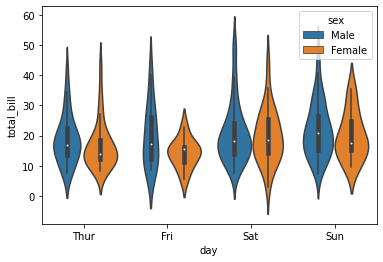

In [133]:
sns.violinplot(x=tips["day"], y=tips["total_bill"], hue=tips["sex"])

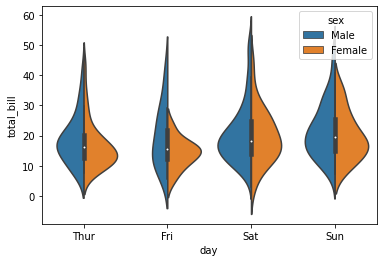

In [134]:
sns.violinplot(x=tips["day"], y=tips["total_bill"], hue=tips["sex"], split=True)

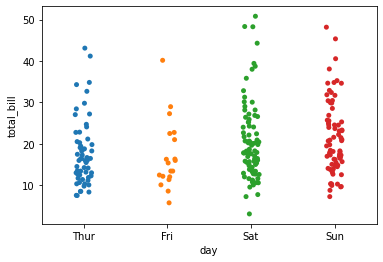

In [135]:
sns.stripplot(x=tips["day"], y=tips["total_bill"])
#stripplot is a plot where one variable is categorical.
#jitter is set to True by default. 
#jitter allows us to actually see how mnay points are stacked up on one another.
#jitter scatters.

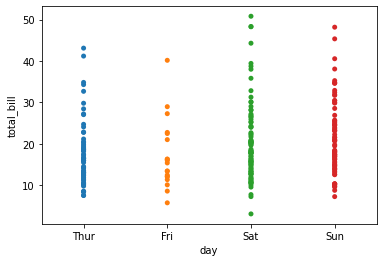

In [136]:
sns.stripplot(x=tips["day"], y=tips["total_bill"], jitter=False)

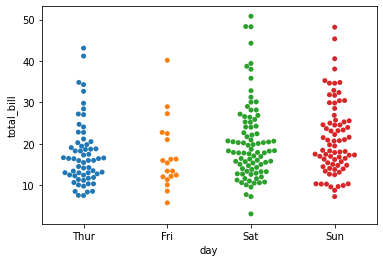

In [137]:
sns.swarmplot(x=tips["day"], y=tips["total_bill"])
#swarmplot is a combination of stripplot and violinplot (kindof).
#these plots arae not suitable for large data.

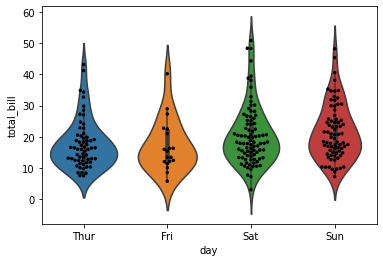

In [138]:
sns.violinplot(x=tips["day"], y=tips["total_bill"])
sns.swarmplot(x=tips["day"], y=tips["total_bill"], color="black", size=3.5)

### **MATRIX PLOTS**

In [139]:
tips=sns.load_dataset("tips")
flights=sns.load_dataset("flights")

In [140]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [141]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [142]:
tc=tips.corr()

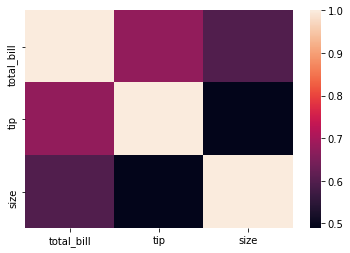

In [143]:
sns.heatmap(tc)
#we can easily tell what the values are, corresponding to each other in the dataset/dataframe using heatmap

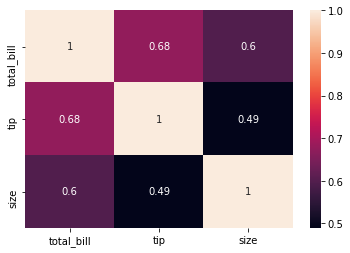

In [144]:
sns.heatmap(tc, annot=True)

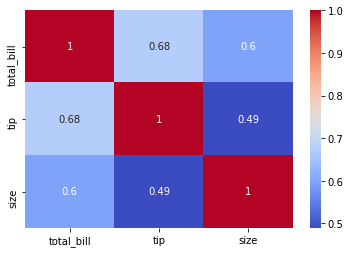

In [145]:
sns.heatmap(tc, annot=True, cmap="coolwarm")

In [146]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [147]:
fc=flights.pivot_table(index="month", columns="year", values="passengers")

In [148]:
fc

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


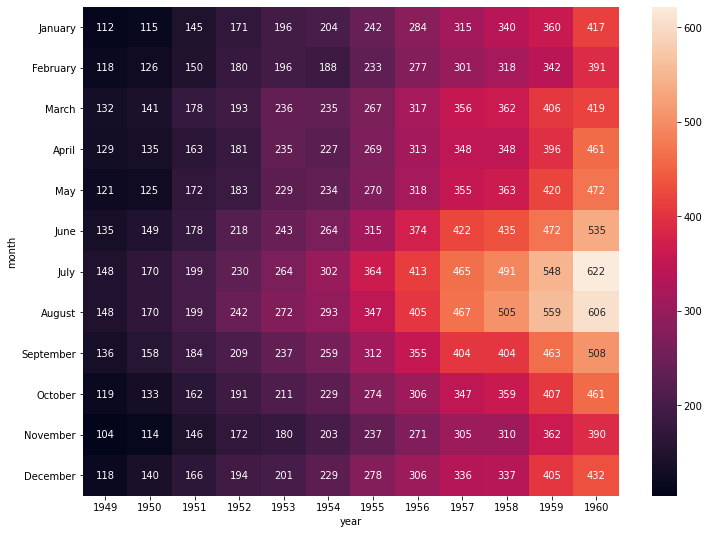

In [149]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(fc, annot=True, fmt="g")

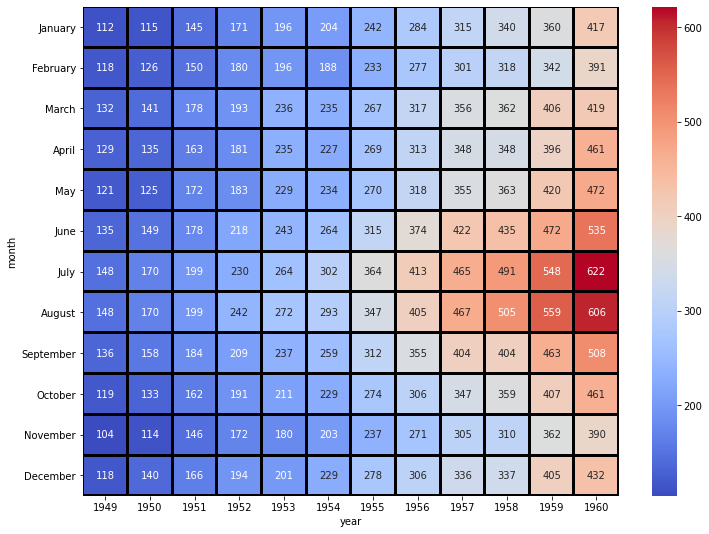

In [150]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(fc, annot=True, fmt="g", cmap="coolwarm", linecolor="black", linewidths=2)

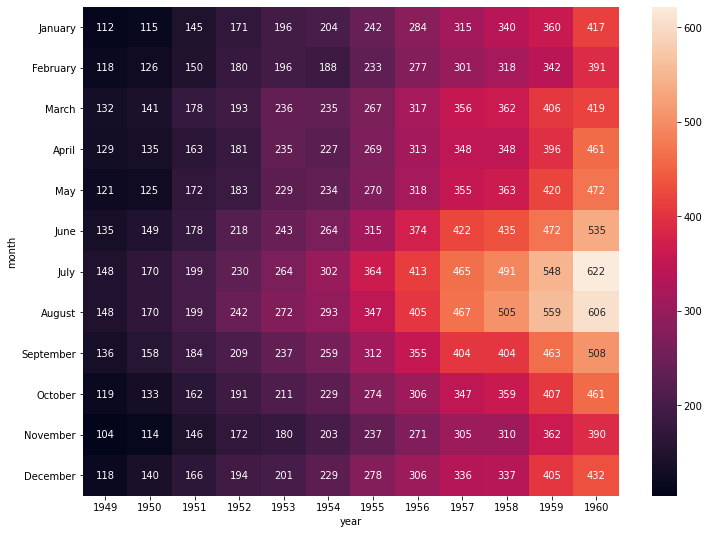

In [151]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(fc, annot=True, fmt="g")

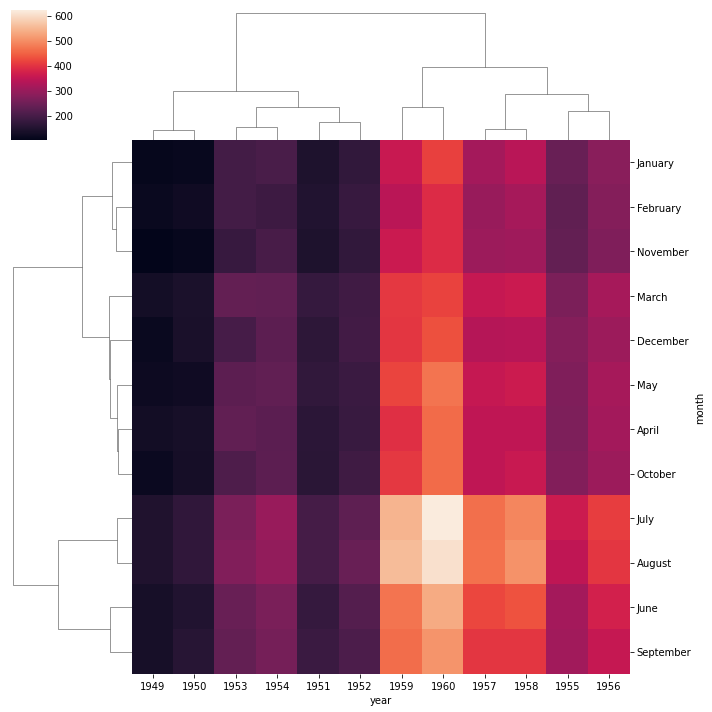

In [152]:
sns.clustermap(fc)
#colums and rows are clustered together based on the similarities with each other.

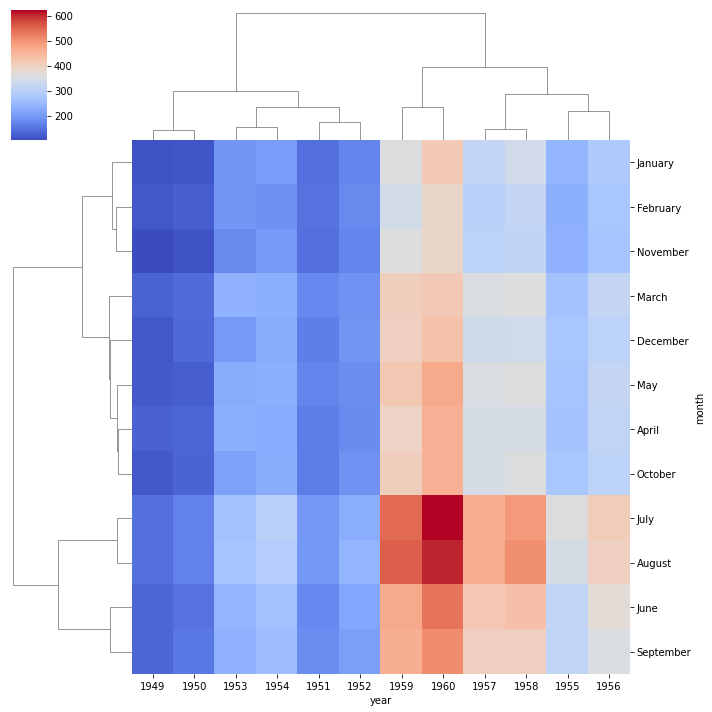

In [153]:
sns.clustermap(fc, cmap="coolwarm")

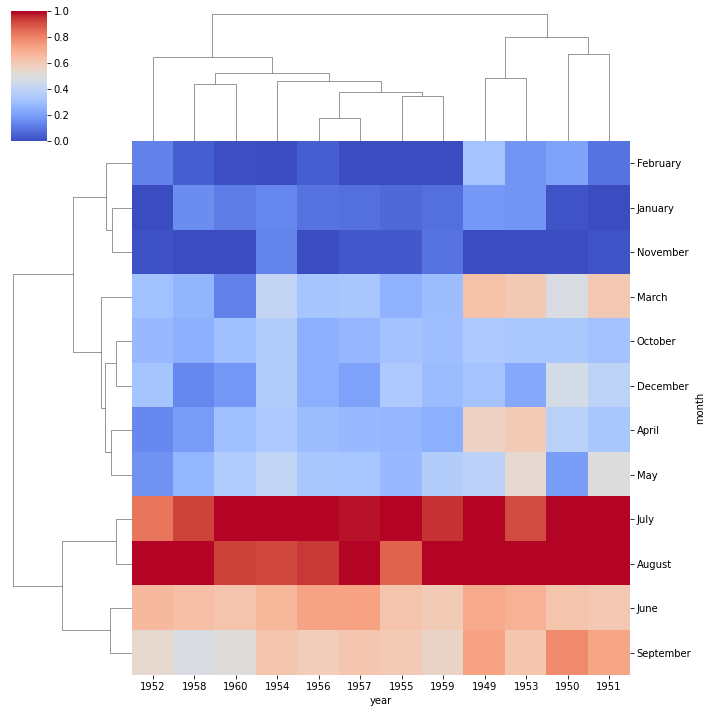

In [154]:
sns.clustermap(fc, cmap="coolwarm", standard_scale=1)

### **GRIDS**

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris=sns.load_dataset("iris")

In [156]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [157]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [158]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

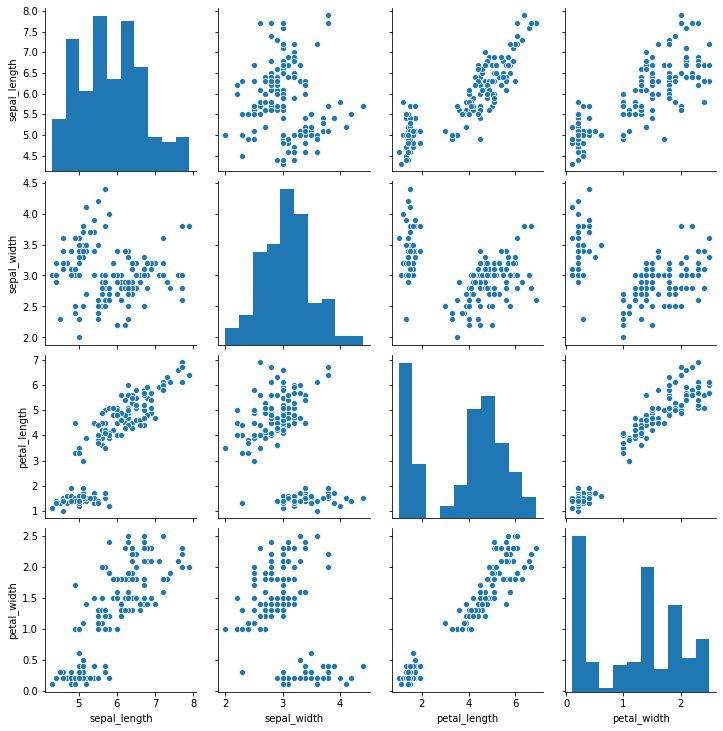

In [159]:
sns.pairplot(iris)

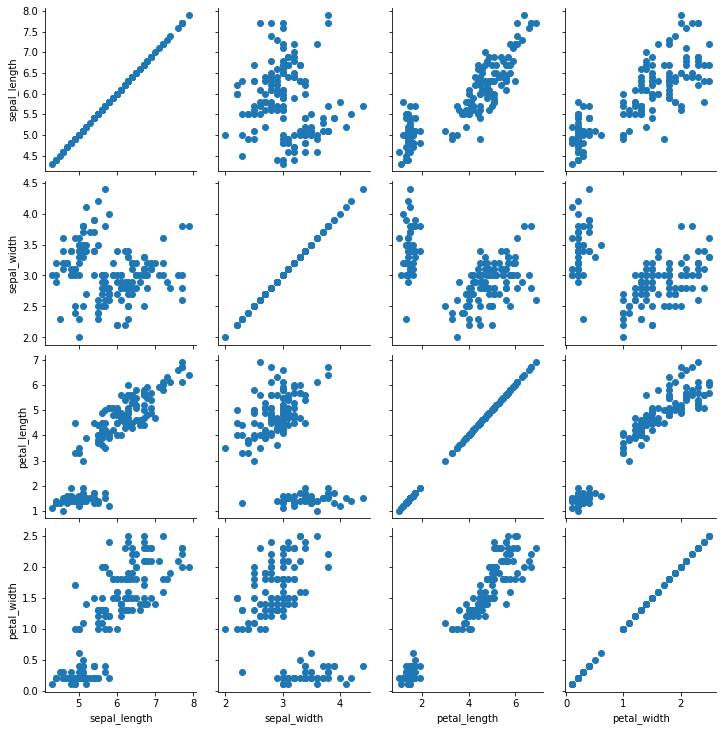

In [160]:
grid=sns.PairGrid(iris)
grid.map(plt.scatter)

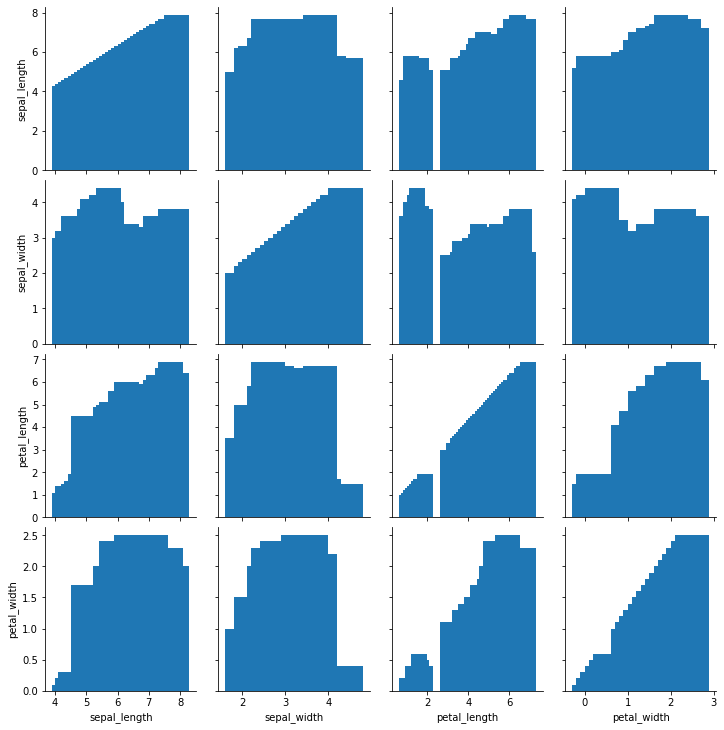

In [161]:
grid=sns.PairGrid(iris)
grid.map(plt.bar)

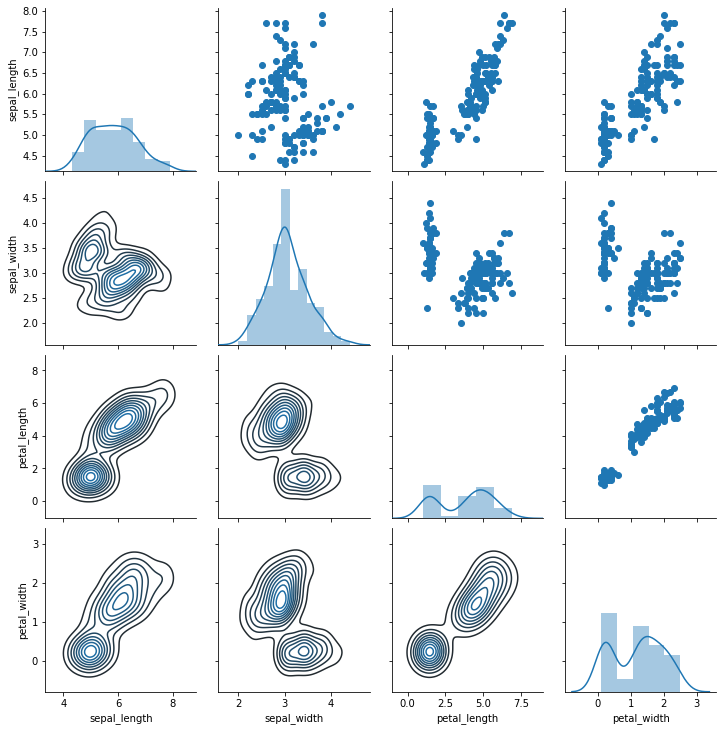

In [162]:
grid=sns.PairGrid(iris)
grid.map_diag(sns.distplot)
grid.map_upper(plt.scatter)
grid.map_lower(sns.kdeplot)

In [163]:
tips=sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [164]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


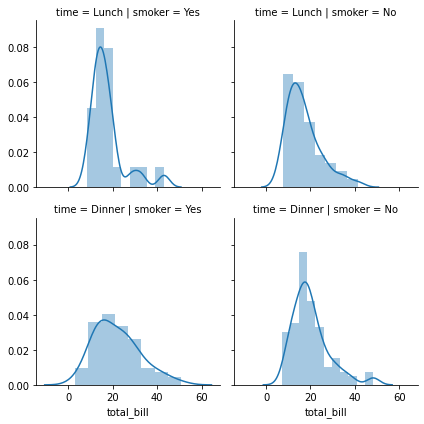

In [165]:
grid=sns.FacetGrid(data=tips, col="smoker", row="time")
grid.map(sns.distplot, "total_bill")
#facetgrid seperates the results based on the columns and rows: here, it is smoker and time.
#you can add another argument for which you want to map for this plot

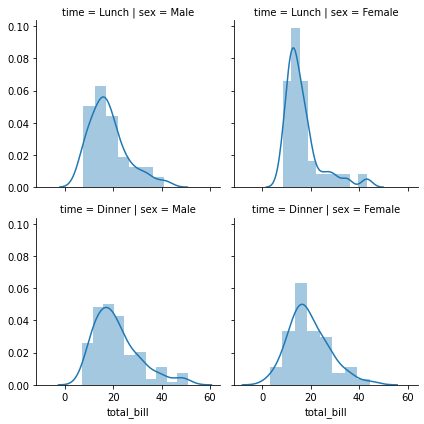

In [166]:
grid=sns.FacetGrid(data=tips, col="sex", row="time")
grid.map(sns.distplot, "total_bill")

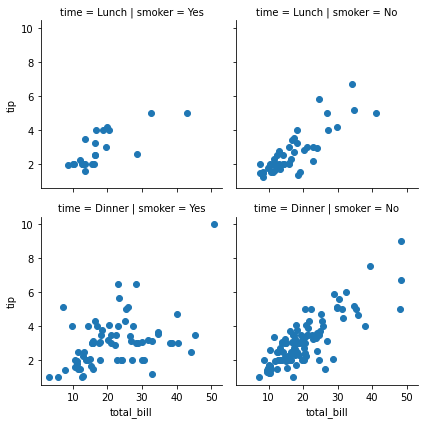

In [167]:
#instead of just 3, you can even plot using 4 arguments.
grid=sns.FacetGrid(col="smoker", row="time", data=tips)
grid.map(plt.scatter, "total_bill", "tip")

### **REGRESSION PLOTS**

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips=sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**lmplot():**
<br>
lmplot is a 2D scatterplot with an optional overlaid regression line. This is useful for comparing numeric variables.

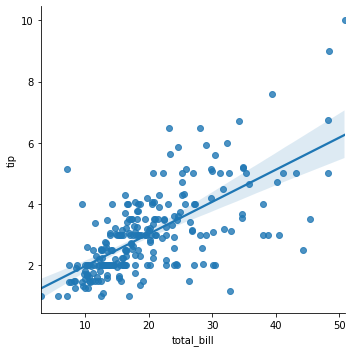

In [169]:
sns.lmplot(x="total_bill", y="tip", data=tips)

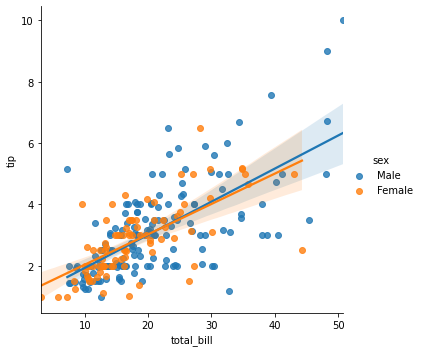

In [170]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue="sex")

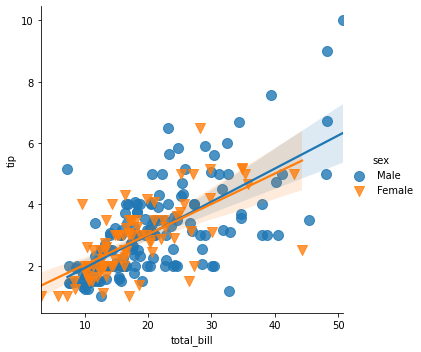

In [171]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue="sex", markers=["o", "v"], scatter_kws={"s": 100})
#scatter_kws is for increasing the size of the markers

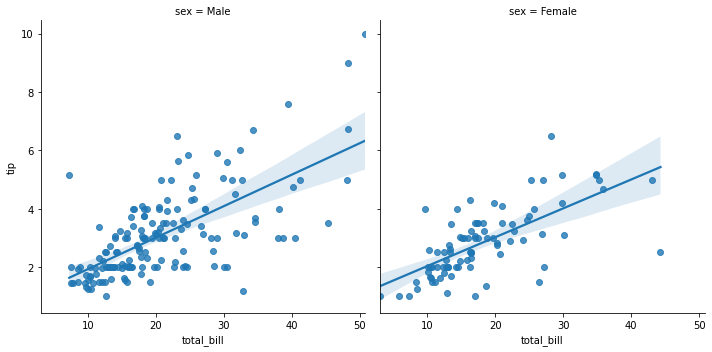

In [172]:
sns.lmplot(x="total_bill", y="tip", data=tips, col="sex")
#instead of plotting in the same plot using two different colors,
#we can plot based off on sex in two seperate plots.
#easier to understand this way.

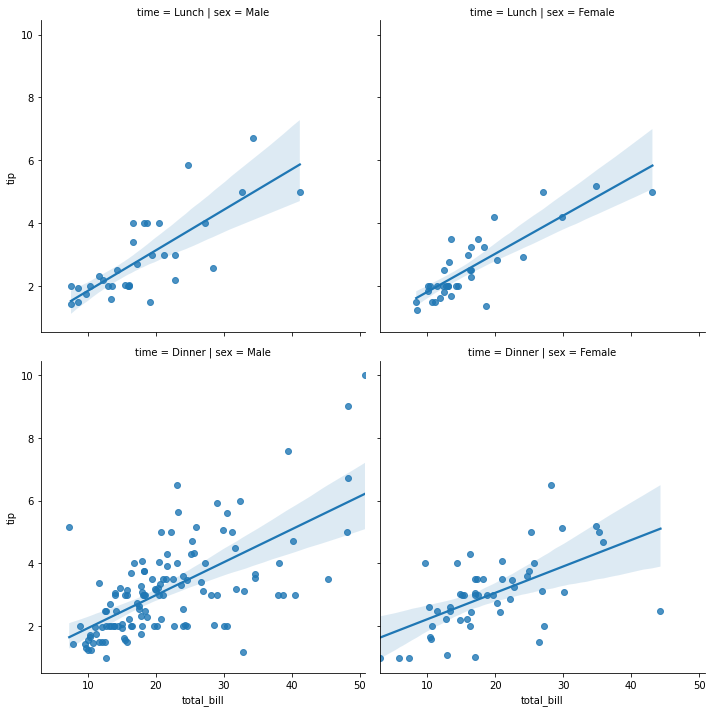

In [173]:
sns.lmplot(x="total_bill", y="tip", data=tips, col="sex", row="time")

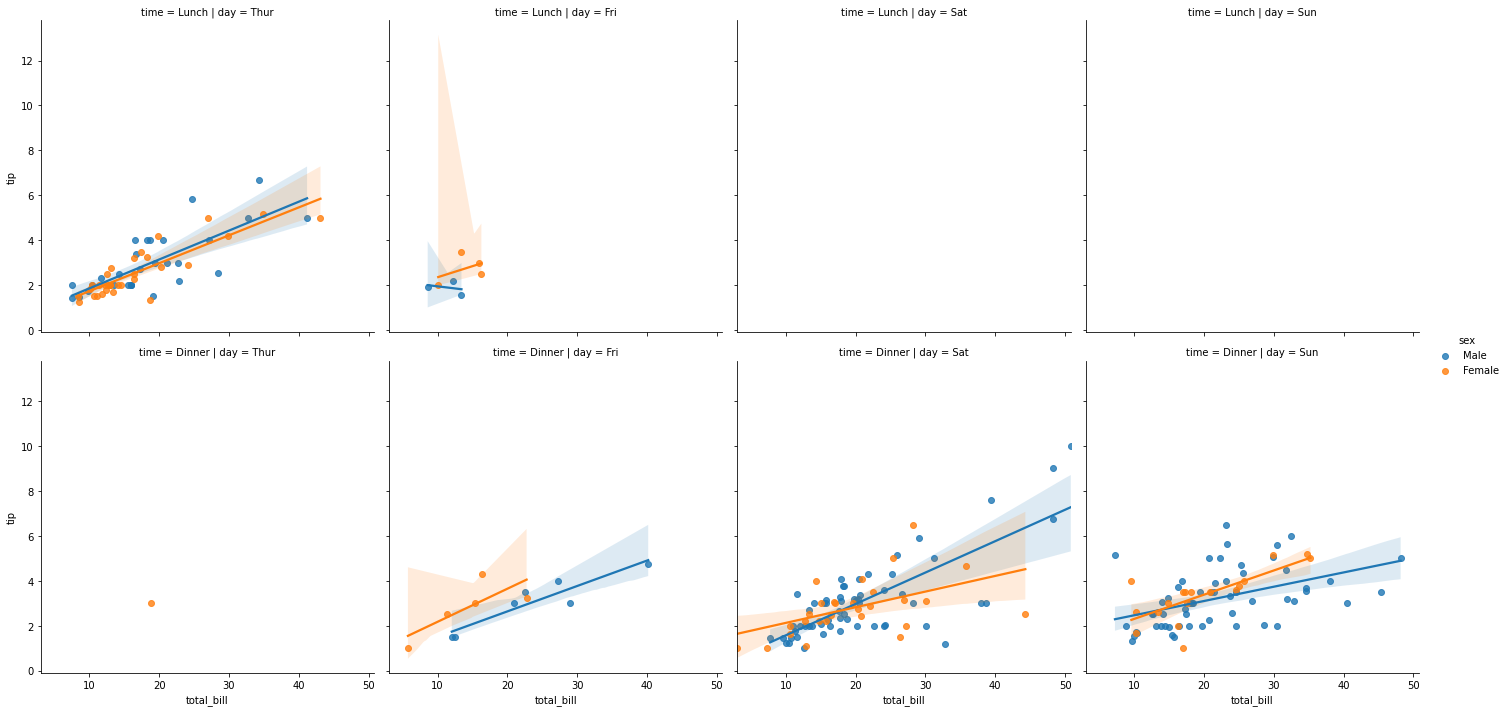

In [174]:
sns.lmplot(x="total_bill", y="tip", data=tips, col="day", row="time", hue="sex")

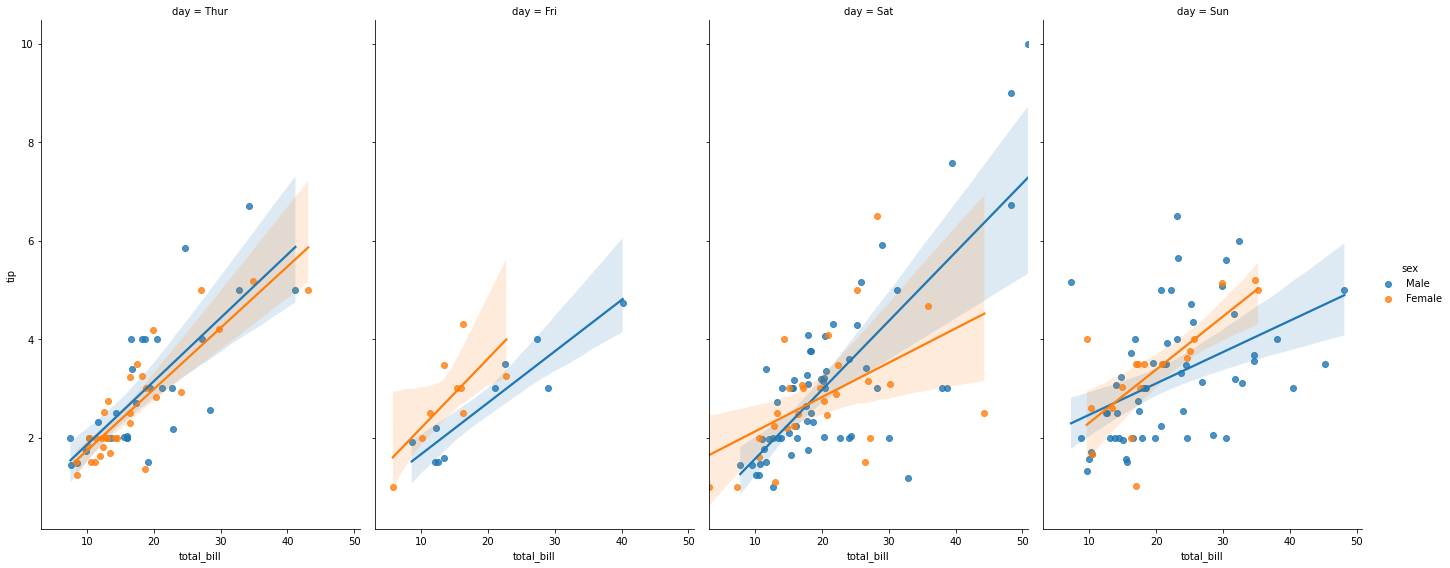

In [175]:
sns.lmplot(x="total_bill", y="tip", data=tips, col="day", hue="sex", aspect=0.6, height=8)